In [22]:
# Prediction Model developed by:
# Khurram Nazir
#  
#
import pandas as pd
import numpy as np
import seaborn as sns
#

import io
from google.colab import files

uploaded_file = files.upload()
#df = pd.read_csv("C:\Users\khurr\Documents\GitHub\AI-Engineering\PIAIC\Quarter-2\DeepLearning\Ionosphere\ionosphere_data.csv",sep=',')
df = pd.DataFrame(pd.read_csv(io.BytesIO(uploaded_file['ionosphere_data.csv']),sep=','))

Saving ionosphere_data.csv to ionosphere_data (2).csv


In [23]:
df = df.sample(frac=1) #Shuffeling DF. 
df

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,label
277,1,0,0.49515,0.09709,0.29612,0.05825,0.34951,0.00000,0.57282,-0.02427,0.58252,0.02427,0.33495,0.04854,0.52427,0.00485,0.47087,-0.10680,0.43204,0.00485,0.34951,0.05825,0.18932,0.25728,0.31068,-0.15049,0.36547,0.03815,0.39320,0.17476,0.26214,0.00000,0.37379,-0.01942,g
238,1,0,0.06404,-0.15271,-0.04433,0.05911,0.08374,-0.02463,-0.01478,0.18719,0.06404,0.00000,0.12315,-0.09852,0.05911,0.00000,0.01970,-0.02956,-0.12808,-0.20690,0.06897,0.01478,0.06897,0.02956,0.07882,0.16256,0.28079,-0.04926,-0.05911,-0.09360,0.04433,0.05419,0.07389,-0.10837,b
210,0,0,-1.00000,-1.00000,1.00000,-1.00000,-1.00000,1.00000,0.00000,0.00000,1.00000,-1.00000,1.00000,-1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-1.00000,1.00000,1.00000,-1.00000,-1.00000,1.00000,1.00000,1.00000,0.00000,0.00000,1.00000,0.50000,0.00000,0.00000,b
183,1,0,0.92247,-0.19448,0.96419,-0.17674,0.87024,-0.22602,0.81702,-0.27070,0.79271,-0.28909,0.70302,-0.49639,0.63338,-0.49967,0.37254,-0.70729,0.27070,-0.72109,0.40506,-0.54172,0.33509,-0.59691,0.14750,-0.63601,0.09312,-0.59589,-0.07162,-0.54928,-0.01840,-0.54074,-0.07457,-0.47898,g
308,1,0,0.75564,0.49638,0.83550,0.54301,0.54916,0.72063,0.35225,0.70792,0.13469,0.94749,-0.09818,0.93778,-0.37604,0.82223,-0.52742,0.71161,-0.68358,0.67989,-0.70163,0.24956,-0.79147,0.02995,-0.98988,-0.29099,-0.70352,-0.32792,-0.63312,-0.19185,-0.34131,-0.60454,-0.19609,-0.62956,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,0.73082,0.05346,0.85443,0.00827,0.54591,0.00299,0.83775,-0.13644,0.75535,-0.08540,0.70887,-0.27502,0.43385,-0.12062,0.57528,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
211,1,0,0.45455,0.09091,0.63636,0.09091,0.27273,0.18182,0.63636,0.00000,0.36364,-0.09091,0.45455,-0.09091,0.48612,-0.01343,0.63636,-0.18182,0.45455,0.00000,0.36364,-0.09091,0.27273,0.18182,0.36364,-0.09091,0.34442,-0.01768,0.27273,0.00000,0.36364,0.00000,0.28985,-0.01832,g
296,1,0,0.88116,0.27475,0.72125,0.42881,0.61559,0.63662,0.38825,0.90502,0.09831,0.96128,-0.20097,0.89200,-0.35737,0.77500,-0.65114,0.62210,-0.78768,0.45535,-0.81856,0.19095,-0.83943,-0.08079,-0.78334,-0.26356,-0.67557,-0.45511,-0.54732,-0.60858,-0.30512,-0.66700,-0.19312,-0.75597,g
16,1,0,0.99645,0.06468,1.00000,-0.01236,0.97811,0.02498,0.96112,0.02312,0.99274,0.07808,0.89323,0.10346,0.94212,0.05269,0.88809,0.11120,0.86104,0.08631,0.81633,0.11830,0.83668,0.14442,0.81329,0.13412,0.79476,0.13638,0.79110,0.15379,0.77122,0.15930,0.70941,0.12015,g


In [24]:
def df_lookslike(v_df):
    #---------------------------------------How dataframe looks like?
    v_df.info()
    print(v_df.head(5))
    total_cells=np.product(v_df.shape)
    num_col = [i for i in v_df.columns if (v_df[i].dtype=='int64' or v_df[i].dtype=='float64')]
    print(v_df[num_col].describe().loc[['min','max', 'mean','50%'],:]) #How big is Messy data?
    missing_Values=v_df.isnull().sum()
    print(missing_Values)
    total_missing=missing_Values.sum()

    #Percent of Missing data
    print("Percent of data is missing:",((total_missing/total_cells) * 100))
#
df_lookslike(df)# How DF looks like?

<class 'pandas.core.frame.DataFrame'>
Int64Index: 351 entries, 277 to 281
Data columns (total 35 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   feature1   351 non-null    int64  
 1   feature2   351 non-null    int64  
 2   feature3   351 non-null    float64
 3   feature4   351 non-null    float64
 4   feature5   351 non-null    float64
 5   feature6   351 non-null    float64
 6   feature7   351 non-null    float64
 7   feature8   351 non-null    float64
 8   feature9   351 non-null    float64
 9   feature10  351 non-null    float64
 10  feature11  351 non-null    float64
 11  feature12  351 non-null    float64
 12  feature13  351 non-null    float64
 13  feature14  351 non-null    float64
 14  feature15  351 non-null    float64
 15  feature16  351 non-null    float64
 16  feature17  351 non-null    float64
 17  feature18  351 non-null    float64
 18  feature19  351 non-null    float64
 19  feature20  351 non-null    float64
 20  feature2

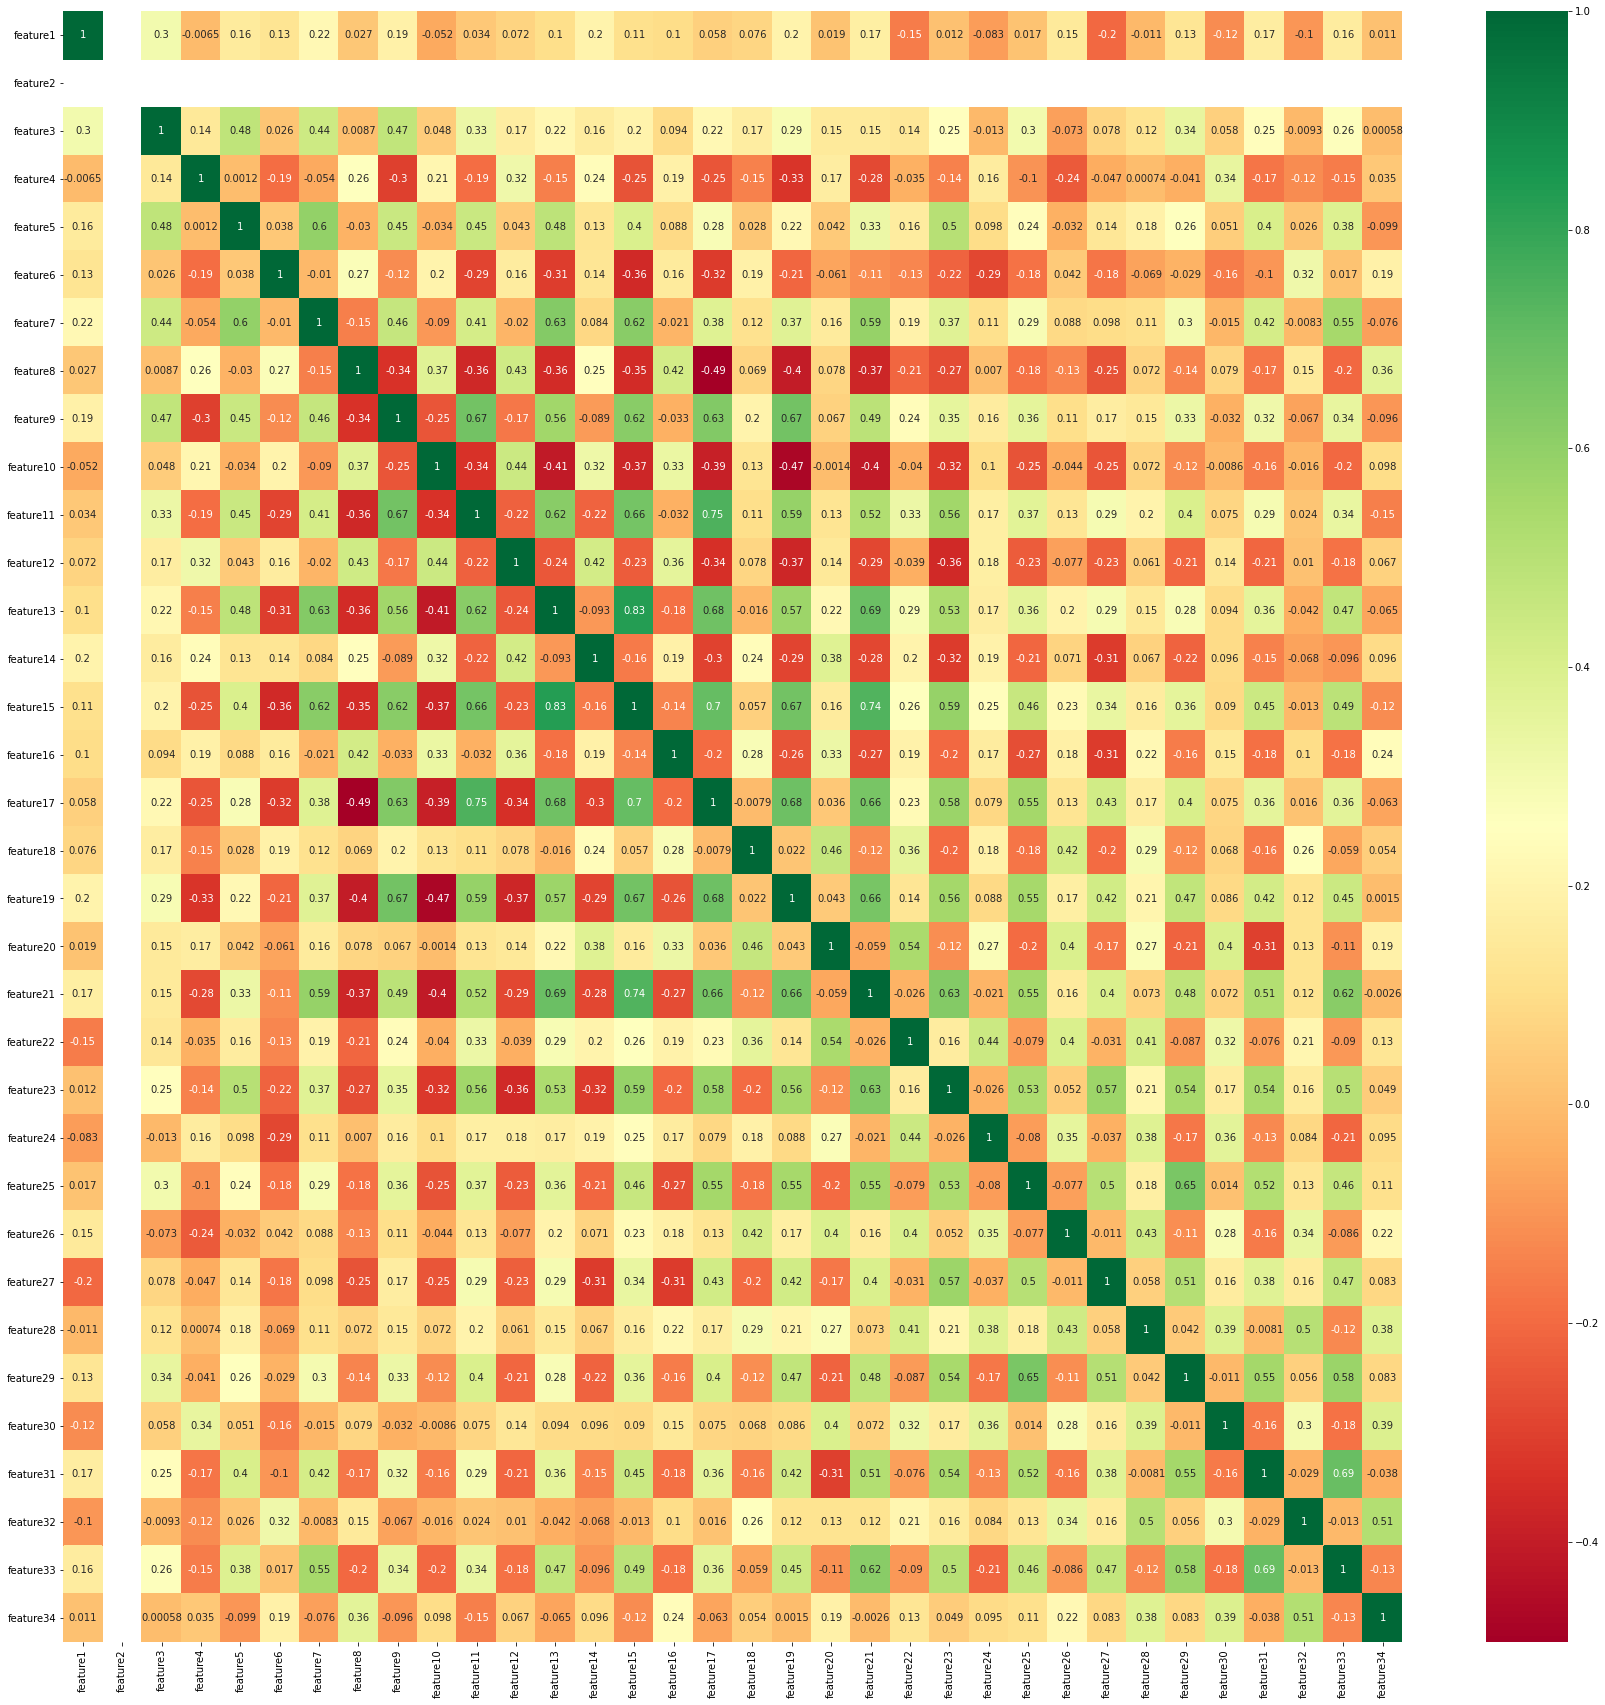

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

corrmat = df.corr(method='pearson',min_periods=5) #pearson : standard correlation coefficient,
top_corr_features = corrmat.index
plt.figure(figsize=(30,30))
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [26]:
# I observed there is no data for column Feature2. Thus, removing from DF.
df.drop(columns='feature2',inplace=True)

In [27]:
df.label.value_counts()

g    225
b    126
Name: label, dtype: int64

In [28]:
# so here we will encode label column, b=1 and g=0
replace_values = {'label':{'g':0, 'b':1}}
df = df.replace(replace_values)

In [29]:
y = df.label
x = df.drop(columns='label')

In [30]:
# now split tha data to train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size= 0.6 )

In [31]:
X_train

,feature1,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34
94,1,0.29202,0.13582,0.45331,0.16808,0.51783,-0.00509,0.52632,0.20883,0.52462,-0.16638,0.47368,-0.04754,0.55518,0.03905,0.81664,-0.22411,0.42445,-0.04244,0.34975,0.06621,0.28183,-0.20883,0.51731,-0.03176,0.50369,-0.03351,0.34635,0.09847,0.70798,-0.01868,0.39559,-0.03226
33,1,0.71253,-0.02595,0.41287,-0.23067,0.98019,-0.09473,0.99709,-0.10236,1.00000,-0.10951,0.58965,1.00000,0.83726,-1.00000,0.82270,-0.17863,0.80760,-0.28257,-0.25914,0.92730,0.51933,0.05456,0.65493,-0.20392,0.93124,-0.41307,0.63811,-0.21901,0.86136,-0.87354,-0.23186,-1.00000
78,1,1.00000,0.24168,1.00000,0.48590,1.00000,0.72973,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,0.77128,1.00000,1.00000,1.00000,1.00000,0.74468,1.00000,0.89647,1.00000,0.64628,1.00000,0.38255,1.00000,0.10819,1.00000,-0.17370,1.00000,-0.81383,1.00000
336,1,0.88420,0.36724,0.67123,0.67382,0.39613,0.86399,0.02424,0.93182,-0.35148,0.83713,-0.60316,0.58842,-0.78658,0.38778,-0.83285,-0.00642,-0.69318,-0.32963,-0.52504,-0.53924,-0.27377,-0.68126,0.00806,-0.69774,0.26028,-0.60678,0.44569,-0.43383,0.54209,-0.21542,0.56286,0.02823
20,1,1.00000,-0.00612,1.00000,-0.09834,1.00000,-0.07649,1.00000,-0.10605,1.00000,-0.11073,1.00000,-0.39489,1.00000,-0.15616,0.92124,-0.31884,0.86473,-0.34534,0.91693,-0.44072,0.96060,-0.46866,0.81874,-0.40372,0.82681,-0.42231,0.75784,-0.38231,0.80448,-0.40575,0.74354,-0.45039
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,1,0.84713,-0.03397,0.86412,-0.08493,0.81953,0.00000,0.73673,-0.07643,0.71975,-0.13588,0.74947,-0.11677,0.77495,-0.18684,0.78132,-0.21231,0.61996,-0.10191,0.79193,-0.15711,0.89384,-0.03397,0.84926,-0.26115,0.74115,-0.23312,0.66242,-0.22293,0.72611,-0.37792,0.65817,-0.24841
76,1,1.00000,0.04078,1.00000,0.11982,1.00000,0.16159,1.00000,0.27921,0.98703,0.30889,0.92745,0.37639,0.91118,0.39749,0.81939,0.46059,0.78619,0.46994,0.79400,0.56282,0.70331,0.58129,0.67077,0.59723,0.58903,0.60990,0.53952,0.60932,0.45312,0.63636,0.40442,0.62658
276,1,0.60678,-0.02712,0.67119,0.04068,0.52881,-0.04407,0.50508,0.03729,0.70508,-0.07797,0.57966,-0.02034,0.53220,0.07797,0.64068,0.11864,0.56949,-0.02373,0.53220,0.00678,0.71525,-0.03390,0.52881,-0.03390,0.57262,0.00750,0.58644,-0.00339,0.58983,-0.02712,0.50169,0.06780
141,1,0.95202,0.02254,0.93757,-0.01272,0.93526,0.01214,0.96705,-0.01734,0.96936,0.00520,0.95665,-0.03064,0.95260,-0.00405,0.99480,-0.02659,0.99769,0.01792,0.93584,-0.04971,0.93815,-0.02370,0.97052,-0.04451,0.96215,-0.01647,0.97399,0.01908,0.95434,-0.03410,0.95838,0.00809


In [32]:
# Build The Model
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras import regularizers

In [33]:
network = Sequential()

In [34]:
network.add(layers.Dense(10, activation='relu', kernel_regularizer = regularizers.l2(0.001),  input_shape=(X_train.shape[1],)))
network.add(layers.Dense(8, activation='relu' , kernel_regularizer = regularizers.l2(0.001)))
network.add(layers.Dense(6, activation='relu' , kernel_regularizer = regularizers.l2(0.001)))
network.add(layers.Dense(4, activation='relu' , kernel_regularizer = regularizers.l2(0.001)))
network.add(layers.Dense(1, activation='sigmoid'))

In [35]:
network.compile(optimizer='adam', loss='binary_crossentropy', metrics='accuracy')

In [36]:
network.fit(X_train, Y_train, epochs=100, batch_size=8)

Epoch 1/100
18/18 [==============================] - 1s 2ms/step - loss: 0.7294 - accuracy: 0.3788
Epoch 2/100
18/18 [==============================] - 0s 1ms/step - loss: 0.7068 - accuracy: 0.7655
Epoch 3/100
18/18 [==============================] - 0s 1ms/step - loss: 0.6924 - accuracy: 0.7831
Epoch 4/100
18/18 [==============================] - 0s 1ms/step - loss: 0.6825 - accuracy: 0.8380
Epoch 5/100
18/18 [==============================] - 0s 1ms/step - loss: 0.6639 - accuracy: 0.8344
Epoch 6/100
18/18 [==============================] - 0s 1ms/step - loss: 0.6512 - accuracy: 0.8328
Epoch 7/100
18/18 [==============================] - 0s 1ms/step - loss: 0.6315 - accuracy: 0.8521
Epoch 8/100
18/18 [==============================] - 0s 1ms/step - loss: 0.5952 - accuracy: 0.8743
Epoch 9/100
18/18 [==============================] - 0s 1ms/step - loss: 0.5889 - accuracy: 0.8515
Epoch 10/100
18/18 [==============================] - 0s 2ms/step - loss: 0.5439 - accuracy: 0.8614
Epoch 11/

In [39]:
prediction = network.predict(X_test)
network.evaluate(X_test, Y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.4880 - accuracy: 0.8720


[0.4880240261554718, 0.8720378875732422]

In [40]:
prediction.shape

(211, 1)

In [42]:

result = pd.DataFrame({'Actual': Y_test})
result['prediction'] = prediction
result.reset_index(inplace=True)
result

,index,Actual,prediction
0,105,0,0.005934
1,99,0,0.011878
2,101,0,0.007125
3,138,1,0.999841
4,0,0,0.021188
...,...,...,...
206,162,1,1.000000
207,85,1,0.029704
208,125,0,0.006559
209,28,0,0.001655
